In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns




## Number of defoliated and non defoliated fires for each region




In [5]:
# ontario
ont_bi_defol = pd.read_csv('../data/outputs/on/on_burn_indices.csv')
ont_non_defol = gpd.read_file('../data/outputs/on/on_no_insect_history_perimeters.shp').shape[0]

# quebec 
qc_bi_defol = pd.read_csv('../data/outputs/qc/qc_burn_indices.csv')
qc_non_defol = gpd.read_file('../data/outputs/qc/qc_no_insect_history_perimeters.shp').shape[0]

Ontario:  361 defoliation events
Quebec:  1003 defoliation events
Ontario:  1257 non-defoliation events
Quebec:  1220 non-defoliation events


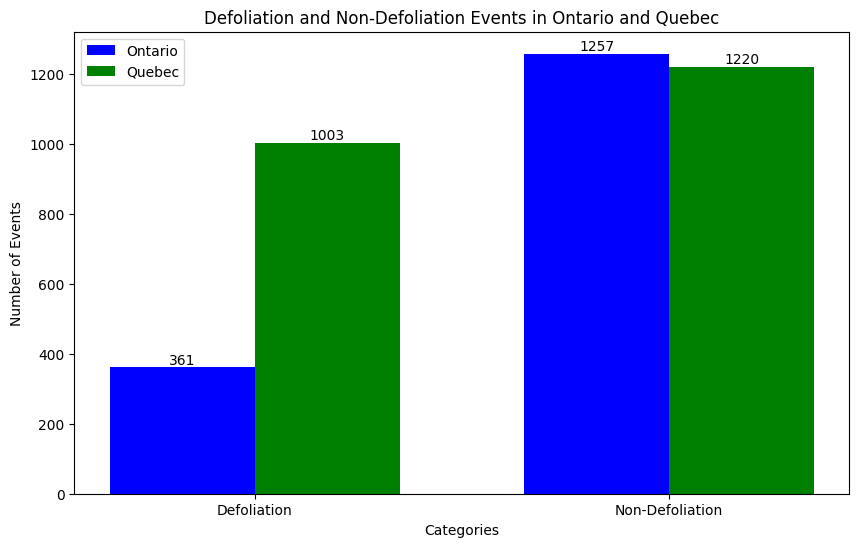

In [11]:
num_on_defol = ont_bi_defol.shape[0]
num_qc_defol = qc_bi_defol.shape[0]

print('Ontario: ', num_on_defol, 'defoliation events')
print('Quebec: ', num_qc_defol, 'defoliation events')
print('Ontario: ', ont_non_defol, 'non-defoliation events')
print('Quebec: ', qc_non_defol, 'non-defoliation events')

# Data for the bar graph
categories = ['Defoliation', 'Non-Defoliation']
ontario_values = [num_on_defol, ont_non_defol]
quebec_values = [num_qc_defol, qc_non_defol]

# Plotting the grouped bar graph
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, ontario_values, width, label='Ontario', color='blue')
bars2 = ax.bar(x + width/2, quebec_values, width, label='Quebec', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Events')
ax.set_title('Defoliation and Non-Defoliation Events in Ontario and Quebec')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Add labels to the bars
add_labels(bars1)
add_labels(bars2)

# Display the plot
plt.show()

## Ontario and quebec burn indices 


/tmp/ipykernel_1791674/2182044916.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([ont_rbr_w_offset, qc_rbr_w_offset], labels=['Ontario', 'Quebec'])


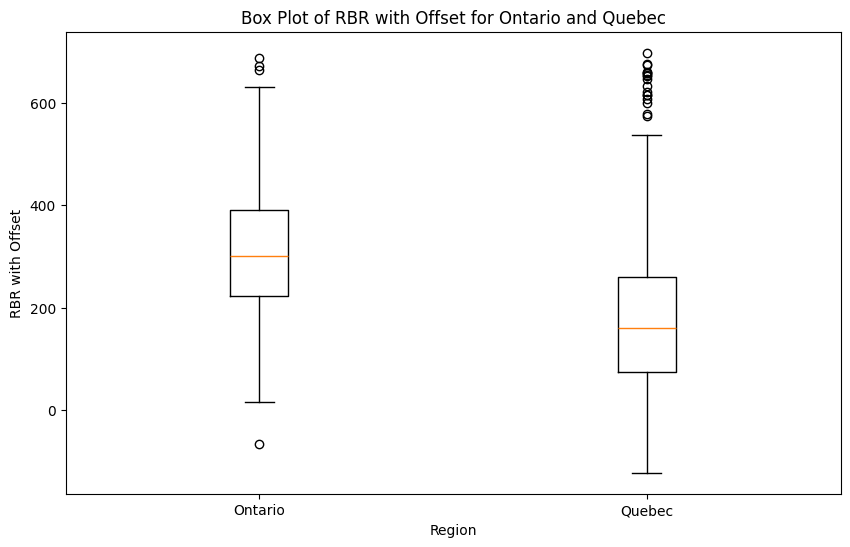

In [13]:
# Extract the rbr_w_offset column from both DataFrames
ont_rbr_w_offset = ont_bi_defol['rbr_w_offset']
qc_rbr_w_offset = qc_bi_defol['rbr_w_offset']

# Create a box plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([ont_rbr_w_offset, qc_rbr_w_offset], labels=['Ontario', 'Quebec'])

# Add some text for labels, title, etc.
ax.set_xlabel('Region')
ax.set_ylabel('RBR with Offset')
ax.set_title('Box Plot of RBR with Offset for Ontario and Quebec')

# Display the plot
plt.show()

In [14]:
def count_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers.count()

# Extract the rbr_w_offset column from both DataFrames
ont_rbr_w_offset = ont_bi_defol['rbr_w_offset']
qc_rbr_w_offset = qc_bi_defol['rbr_w_offset']

# Count the number of outliers
num_ont_outliers = count_outliers(ont_rbr_w_offset)
num_qc_outliers = count_outliers(qc_rbr_w_offset)

print(f'Number of outliers in Ontario: {num_ont_outliers}')
print(f'Number of outliers in Quebec: {num_qc_outliers}')

Number of outliers in Ontario: 4
Number of outliers in Quebec: 17


/tmp/ipykernel_1791674/2918991802.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([ont_rbr_w_offset, qc_rbr_w_offset], labels=['Ontario', 'Quebec'])


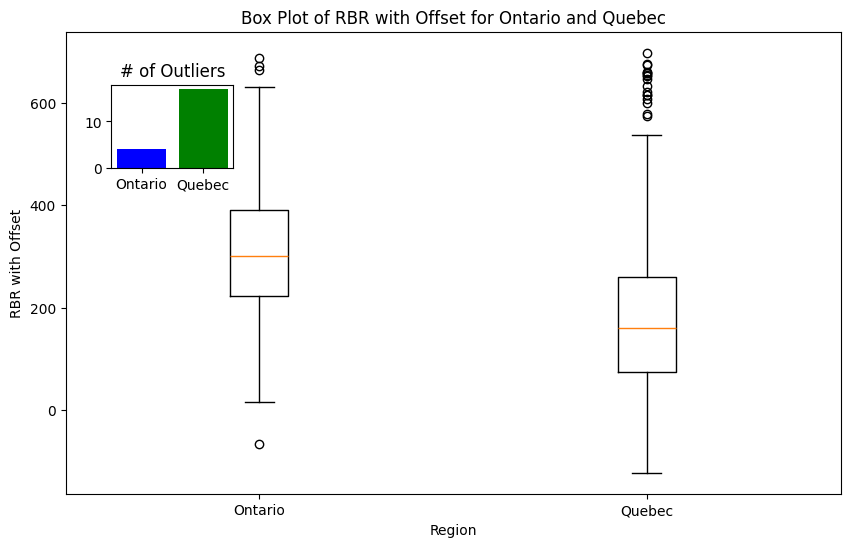

In [31]:
# Create a box plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([ont_rbr_w_offset, qc_rbr_w_offset], labels=['Ontario', 'Quebec'])

# Add some text for labels, title, etc.
ax.set_xlabel('Region')
ax.set_ylabel('RBR with Offset')
ax.set_title('Box Plot of RBR with Offset for Ontario and Quebec')

# Create an inset bar plot
inset_ax = inset_axes(ax, width="35%", height="40%", loc='upper left', bbox_to_anchor=(0.05, 0.45, 0.45, 0.45), bbox_transform=ax.transAxes)
inset_ax.bar(['Ontario', 'Quebec'], [num_ont_outliers, num_qc_outliers], color=['blue', 'green'])
inset_ax.set_title('# of Outliers')


# Display the plot
plt.show()

## Recovery Magnitude

In [37]:
on_recovery = pd.read_csv('../data/outputs/on/on_recovery_magnitude/on_recovery_magnitude.csv')
qc_recovery = pd.read_csv('../data/outputs/qc/qc_recovery_magnitude/on_recovery_magnitude.csv')

print(on_recovery.shape[0])
print(qc_recovery.shape[0])

365
1009


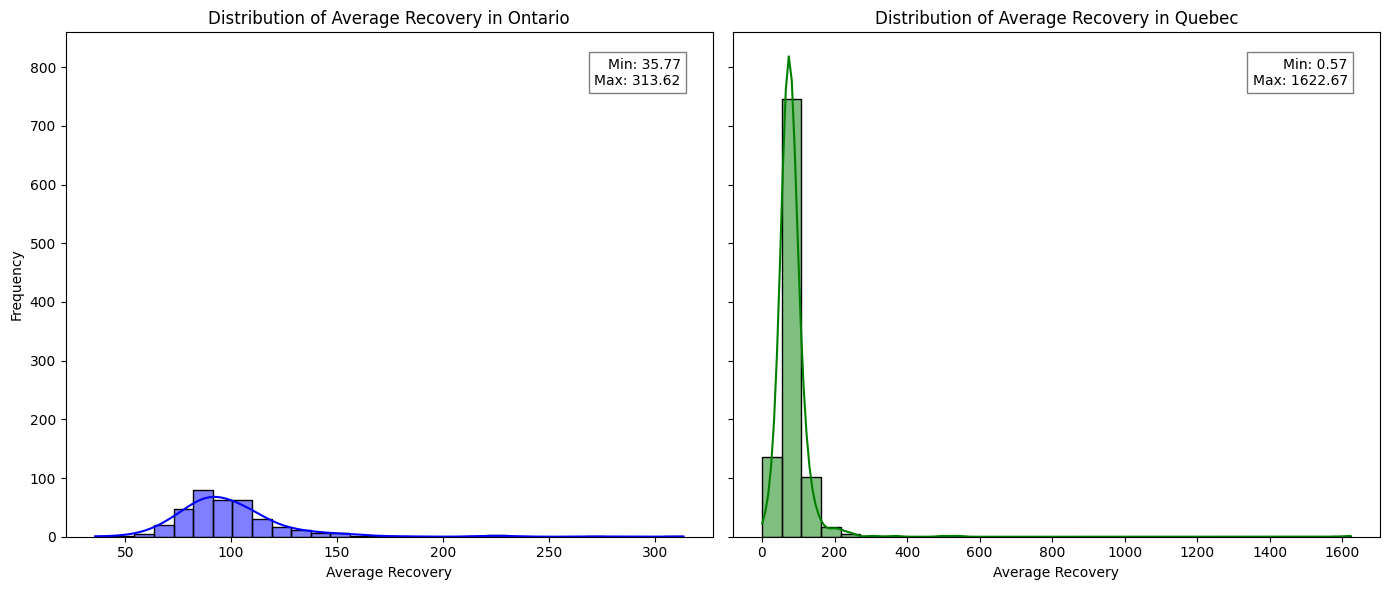

In [45]:
# Calculate min and max values for each dataset
on_min = on_recovery['Average Recovery'].min()
on_max = on_recovery['Average Recovery'].max()
qc_min = qc_recovery['Average Recovery'].min()
qc_max = qc_recovery['Average Recovery'].max()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the distribution of Average Recovery for Ontario
sns.histplot(on_recovery['Average Recovery'], kde=True, color='blue', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Average Recovery in Ontario')
axes[0].set_xlabel('Average Recovery')
axes[0].set_ylabel('Frequency')
axes[0].text(0.95, 0.95, f'Min: {on_min:.2f}\nMax: {on_max:.2f}', 
             transform=axes[0].transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', 
             bbox=dict(facecolor='white', alpha=0.5))

# Plot the distribution of Average Recovery for Quebec
sns.histplot(qc_recovery['Average Recovery'], kde=True, color='green', bins=30, ax=axes[1])
axes[1].set_title('Distribution of Average Recovery in Quebec')
axes[1].set_xlabel('Average Recovery')
axes[1].text(0.95, 0.95, f'Min: {qc_min:.2f}\nMax: {qc_max:.2f}', 
             transform=axes[1].transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', 
             bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [53]:
# Extract the names of all fires
fire_names = ont_bi_defol['Fire_ID'].unique()


In [55]:
other_gdf= gpd.read_file('../data/inputs/on/fire/ON_FirePerimeters_85to2020_v00.shp')
filtered_gdf = other_gdf[other_gdf['raster_id'].isin(fire_names)]


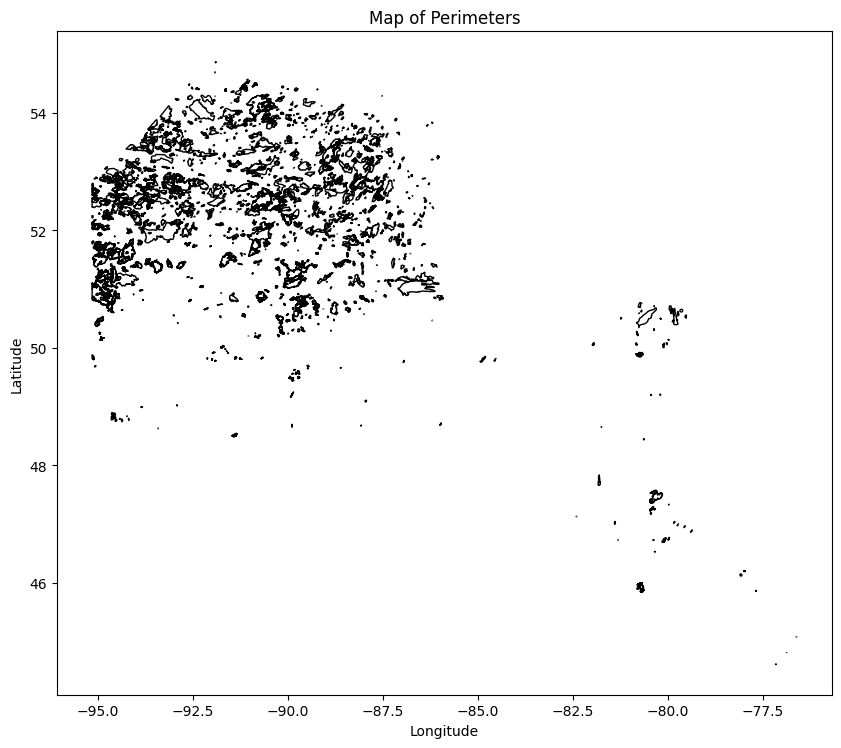

In [51]:
gdf = gpd.read_file('../data/outputs/on/on_no_insect_history_perimeters.shp')


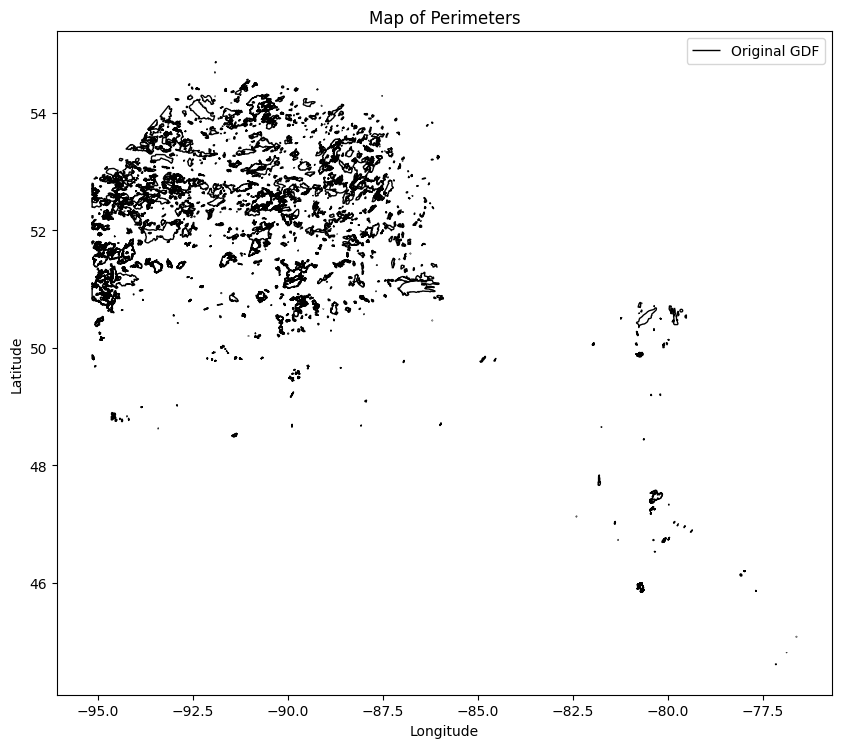

In [57]:
# Plot the perimeters
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the original gdf with one color
gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black', label='Original GDF')

# Check if filtered_gdf is not empty before plotting
if not filtered_gdf.empty:
    # Plot the filtered gdf with another color
    filtered_gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='red', label='Filtered GDF')

# Customize the plot
ax.set_title('Map of Perimeters')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Show the plot
plt.show()

## Tree Species Composition